In [ ]:
!pip install pycaret

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/distan_lat42.3394lon-8.8339p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [14]:
coor.drop(columns=["Unnamed: 0"]).to_excel("coor.xls")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.



In [15]:
#ria forecast do
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/lat42.3394lon-8.8339p4R4KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,prec0,swflx0,shflx0,cape0,cin0,cfh0,cfl0,cfm0,cft0,HGT5000,HGT8500,T5000,T8500,dir1,snow_prec1,snowlevel1,mod1,wind_gust1,mslp1,temp1,rh1,visibility1,lhflx1,lwflx1,conv_prec1,prec1,swflx1,shflx1,...,lwflx2,conv_prec2,prec2,swflx2,shflx2,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502,dir3,snow_prec3,snowlevel3,mod3,wind_gust3,mslp3,temp3,rh3,visibility3,lhflx3,lwflx3,conv_prec3,prec3,swflx3,shflx3,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-11 01:00:00,190.099930,0.0,1893.174805,7.264744,9.906267,102328.617188,286.506866,0.942528,24038.736328,14.788114,323.512573,0.0,0.000,0.0,-3.093262,15.389000,-4.905941,0.578125,0.400000,0.0,0.578125,5699.246094,1531.535034,259.280243,278.426575,192.110916,0.0,1885.281006,7.263834,9.906267,102318.156250,286.710876,0.933628,24038.736328,11.988113,325.012573,0.0,0.000,0.0,-6.793262,...,324.812561,0.0,0.000,0.0,-7.793262,18.525000,-5.510942,0.554688,0.300000,0.0,0.554688,5700.638184,1534.107056,259.250244,278.526550,195.192032,0.0,1895.229614,7.380077,10.006268,102319.023438,286.778870,0.933528,24038.736328,10.288114,324.512573,0.0,0.000,0.0,-8.293262,17.961000,-6.377942,0.554688,0.300000,0.0,0.554688,5699.585938,1533.610962,259.245239,278.456573
2021-03-11 02:00:00,197.163528,0.0,1873.695435,8.319744,10.389208,102301.453125,286.556366,0.946013,24232.718750,15.259779,366.894470,0.0,0.016,0.0,-4.528906,23.504000,-4.777394,0.515625,0.500000,0.0,0.515625,5693.067871,1528.592041,259.045258,278.295227,198.383011,0.0,1864.695801,8.292401,10.389208,102291.609375,286.717377,0.941113,24232.718750,11.459780,368.994476,0.0,0.001,0.0,-8.428906,...,368.894470,0.0,0.000,0.0,-8.228907,27.945999,-4.155395,0.500000,0.500000,0.0,0.500000,5694.711914,1531.004028,259.012238,278.385223,198.908875,0.0,1871.833130,7.884734,10.389208,102291.593750,286.756378,0.941513,24232.718750,9.059779,368.894470,0.0,0.000,0.0,-8.828906,28.046000,-5.044394,0.468750,0.500000,0.0,0.500000,5693.571777,1530.416016,259.013245,278.285248
2021-03-11 03:00:00,199.934814,0.0,1794.957031,8.281711,10.366445,102251.437500,286.592987,0.946405,24232.691406,14.275503,370.195892,0.0,0.006,0.0,-5.123437,36.521999,-5.648910,0.328125,0.710938,0.0,0.710938,5681.936035,1523.298950,258.969757,277.528229,201.540405,0.0,1800.228394,8.262547,10.666445,102241.101562,286.730988,0.943105,24232.691406,10.375504,369.995911,0.0,0.000,0.0,-8.523438,...,370.195892,0.0,0.000,0.0,-7.923438,36.584000,-5.128910,0.328125,0.710938,0.0,0.710938,5683.543945,1525.718994,258.963745,277.678253,203.760620,0.0,1809.120117,7.752617,10.266444,102241.679688,286.755005,0.938905,24232.691406,9.775503,369.995911,0.0,0.000,0.0,-8.623438,34.166000,-5.027910,0.312500,0.742188,0.0,0.742188,5682.295898,1525.256958,258.975739,277.668243
2021-03-11 04:00:00,207.470184,0.0,1775.944458,8.031638,9.995256,102274.250000,286.580994,0.945543,23234.199219,14.194679,371.735779,0.0,0.206,0.0,-4.743018,39.799999,-1.835531,0.132812,0.750000,0.0,0.750000,5675.325195,1524.307983,259.038696,277.319489,209.639755,0.0,1788.402832,8.118349,10.095257,102264.773438,286.712006,0.941543,24234.199219,11.094679,372.835785,0.0,0.117,0.0,-8.043017,...,372.335785,0.0,0.215,0.0,-7.743018,40.549999,-2.235531,0.132812,0.703125,0.0,0.703125,5677.024902,1526.326050,259.023682,277.569489,212.121552,0.0,1799.808350,7.776487,9.895257,102267.968750,286.739990,0.934243,23434.199219,11.694679,372.435791,0.0,0.255,0.0,-8.343018,39.540001,-2.237531,0.132812,0.664062,0.0,0.664062,5675.765137,1525.725952,259.033691,277.559479
2021-03-11 05:00:00,210.838715,0.0,1862.883057,7.983945,10.451688,102301.382812,286.598877,0.942787,24233.667969,14.755339,369.559784,0.0,0.250,0.0,-4.778052,51.700001,-0.672668,0.218750,0.500000,0.0,0.500000,5669.366211,1523.831055,258.927368,278.218933,211.705994,0.0,1863.587402,8.186982,10.65

In [16]:
#station gust variable variable every 10 minutes km/h
station=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/ria_enm_windplus.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")["guss_udr"]
print(station.head(15))

time
2021-03-11 00:10:00    33.2
2021-03-11 00:20:00    35.9
2021-03-11 00:30:00    39.0
2021-03-11 00:40:00    38.3
2021-03-11 00:50:00    39.1
2021-03-11 01:00:00    41.8
2021-03-11 01:10:00    38.2
2021-03-11 01:20:00    41.3
2021-03-11 01:30:00    43.6
2021-03-11 01:40:00    35.3
2021-03-11 01:50:00    34.5
2021-03-11 02:00:00    31.4
2021-03-11 02:10:00    32.7
2021-03-11 02:20:00    31.6
2021-03-11 02:30:00    33.3
Name: guss_udr, dtype: float64


In [17]:
#resample max gust hour before
station=station.resample("H",label="right").max()
station

time
2021-03-11 01:00:00    39.1
2021-03-11 02:00:00    43.6
2021-03-11 03:00:00    35.3
2021-03-11 04:00:00    44.7
2021-03-11 05:00:00    45.3
                       ... 
2022-01-19 21:00:00    10.4
2022-01-19 22:00:00    16.8
2022-01-19 23:00:00    14.4
2022-01-20 00:00:00    17.2
2022-01-20 01:00:00    19.2
Freq: H, Name: guss_udr, Length: 7561, dtype: float64

In [36]:
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()
df_all4k["guss_udr_ms"]=df_all4k["guss_udr"]*0.277778
df_all4k=df_all4k.drop(columns=["guss_udr"])
df_all4k.head(25)

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,prec0,swflx0,shflx0,cape0,cin0,cfh0,cfl0,cfm0,cft0,HGT5000,HGT8500,T5000,T8500,dir1,snow_prec1,snowlevel1,mod1,wind_gust1,mslp1,temp1,rh1,visibility1,lhflx1,lwflx1,conv_prec1,prec1,swflx1,shflx1,...,conv_prec2,prec2,swflx2,shflx2,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502,dir3,snow_prec3,snowlevel3,mod3,wind_gust3,mslp3,temp3,rh3,visibility3,lhflx3,lwflx3,conv_prec3,prec3,swflx3,shflx3,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503,guss_udr_ms
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-11 01:00:00,190.099930,0.0,1893.174805,7.264744,9.906267,102328.617188,286.506866,0.942528,24038.736328,14.788114,323.512573,0.0,0.000,0.000000e+00,-3.093262,15.389000,-4.905941,0.578125,0.400000,0.000000,0.578125,5699.246094,1531.535034,259.280243,278.426575,192.110916,0.0,1885.281006,7.263834,9.906267,102318.156250,286.710876,0.933628,24038.736328,11.988113,325.012573,0.0,0.000,0.000000e+00,-6.793262,...,0.0,0.000,0.000000e+00,-7.793262,18.525000,-5.510942,0.554688,0.300000,0.000000,0.554688,5700.638184,1534.107056,259.250244,278.526550,195.192032,0.0,1895.229614,7.380077,10.006268,102319.023438,286.778870,0.933528,24038.736328,10.288114,324.512573,0.0,0.000,0.000000,-8.293262,17.961000,-6.377942,0.554688,0.300000,0.000000,0.554688,5699.585938,1533.610962,259.245239,278.456573,10.861120
2021-03-11 02:00:00,197.163528,0.0,1873.695435,8.319744,10.389208,102301.453125,286.556366,0.946013,24232.718750,15.259779,366.894470,0.0,0.016,0.000000e+00,-4.528906,23.504000,-4.777394,0.515625,0.500000,0.000000,0.515625,5693.067871,1528.592041,259.045258,278.295227,198.383011,0.0,1864.695801,8.292401,10.389208,102291.609375,286.717377,0.941113,24232.718750,11.459780,368.994476,0.0,0.001,0.000000e+00,-8.428906,...,0.0,0.000,0.000000e+00,-8.228907,27.945999,-4.155395,0.500000,0.500000,0.000000,0.500000,5694.711914,1531.004028,259.012238,278.385223,198.908875,0.0,1871.833130,7.884734,10.389208,102291.593750,286.756378,0.941513,24232.718750,9.059779,368.894470,0.0,0.000,0.000000,-8.828906,28.046000,-5.044394,0.468750,0.500000,0.000000,0.500000,5693.571777,1530.416016,259.013245,278.285248,12.111121
2021-03-11 03:00:00,199.934814,0.0,1794.957031,8.281711,10.366445,102251.437500,286.592987,0.946405,24232.691406,14.275503,370.195892,0.0,0.006,0.000000e+00,-5.123437,36.521999,-5.648910,0.328125,0.710938,0.000000,0.710938,5681.936035,1523.298950,258.969757,277.528229,201.540405,0.0,1800.228394,8.262547,10.666445,102241.101562,286.730988,0.943105,24232.691406,10.375504,369.995911,0.0,0.000,0.000000e+00,-8.523438,...,0.0,0.000,0.000000e+00,-7.923438,36.584000,-5.128910,0.328125,0.710938,0.000000,0.710938,5683.543945,1525.718994,258.963745,277.678253,203.760620,0.0,1809.120117,7.752617,10.266444,102241.679688,286.755005,0.938905,24232.691406,9.775503,369.995911,0.0,0.000,0.000000,-8.623438,34.166000,-5.027910,0.312500,0.742188,0.000000,0.742188,5682.295898,1525.256958,258.975739,277.668243,9.805563
2021-03-11 04:00:00,207.470184,0.0,1775.944458,8.031638,9.995256,102274.250000,286.580994,0.945543,23234.199219,14.194679,371.735779,0.0,0.206,0.000000e+00,-4.743018,39.799999,-1.835531,0.132812,0.750000,0.000000,0.750000,5675.325195,1524.307983,259.038696,277.319489,209.639755,0.0,1788.402832,8.118349,10.095257,102264.773438,286.712006,0.941543,24234.199219,11.094679,372.835785,0.0,0.117,0.000000e+00,-8.043017,...,0.0,0.215,0.000000e+00,-7.743018,40.549999,-2.235531,0.132812,0.703125,0.000000,0.703125,5677.024902,1526.326050,259.023682,277.569489,212.121552,0.0,1799.808350,7.776487,9.895257,102267.968750,286.739990,0.934243,23434.199219,11.694679,372.435791,0.0,0.255,0.000000,-8.343018,39.540001,-2.237531,0.132812,0.664062,0.000000,0.664062,5675.765137,1525.725952,259.033691,277.559479,12.416677
2021-03-11 05:00:00,210.838715,0.0,1862.883057,7.983945,10.451688,102301.382812,286.598877,0.942787,24233.66

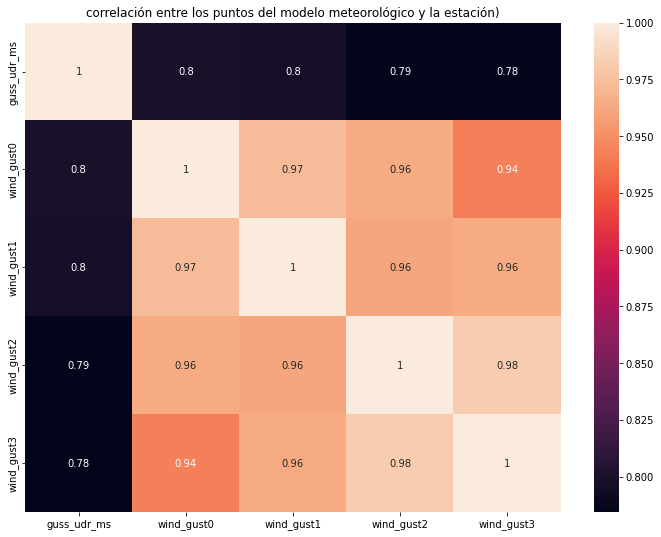

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("correlación entre los puntos del modelo meteorológico y la estación)")
import seaborn as sns


metmodel_Rs=df_all4k[["guss_udr_ms","wind_gust0","wind_gust1","wind_gust2","wind_gust3",]].corr()

sns.heatmap(metmodel_Rs,annot=True);

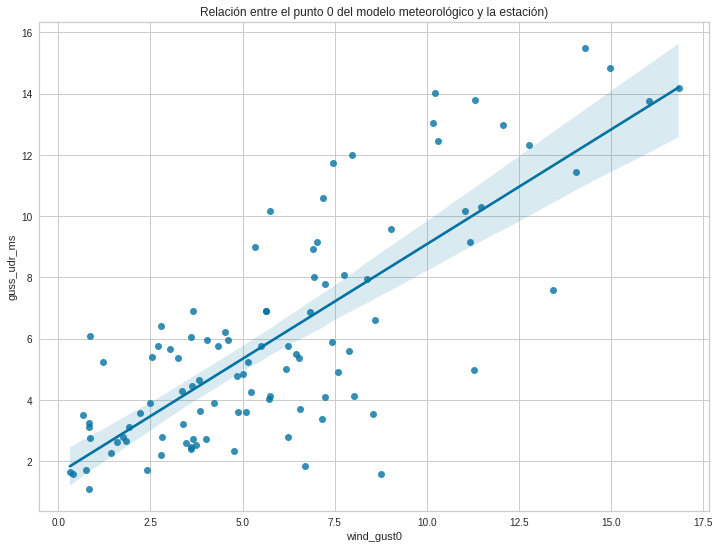

In [67]:
plt.figure(figsize=(12, 9))
plt.title("Relación entre el punto 0 del modelo meteorológico y la estación)")
df_sample=df_all4k.sample(100)
sns.regplot( x="wind_gust0", y="guss_udr_ms",data=df_sample,);

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#df_all4k=df_all4k.sample(700)
#MAE en m/s
MAE=round(mean_absolute_error(df_all4k.guss_udr_ms, df_all4k.wind_gust0),4)
#MSE en m/s
MSE=round(mean_squared_error(df_all4k.guss_udr_ms, df_all4k.wind_gust0),4)
#R2
R2=round(r2_score(df_all4k.guss_udr_ms, df_all4k.wind_gust0),4)


df_r=pd.DataFrame({"MAE":MAE,"MSE":MSE,"R2":R2},index=["resultados"]);
df_r

,MAE,MSE,R2
resultados,1.9393,6.4658,0.5831


In [39]:
from pycaret.regression import *
reg0=setup(df_all4k, target = 'guss_udr_ms',train_size=0.9, feature_selection= False	,
           normalize=False,pca=False,remove_multicollinearity=False,polynomial_features=False,
           remove_outliers=False)

,Description,Value
0,session_id,5656
1,Target,guss_udr_ms
2,Original Data,"(7190, 101)"
3,Missing Values,False
4,Numeric Features,100
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6471, 80)"


In [59]:
compare_models(fold=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.3626,3.5033,1.8711,0.7730,0.2622,0.2754,5.2600
lightgbm,Light Gradient Boosting Machine,1.3892,3.5287,1.8778,0.7714,0.2666,0.2819,1.0167
rf,Random Forest Regressor,1.3957,3.6271,1.9039,0.7650,0.2672,0.2822,14.5833
gbr,Gradient Boosting Regressor,1.5211,4.0469,2.0111,0.7378,0.2872,0.3124,6.2900
ridge,Ridge Regression,1.6820,4.8799,2.2087,0.6837,0.3184,0.3386,0.0567
lr,Linear Regression,1.6852,4.9001,2.2133,0.6824,0.3208,0.3399,1.0667
br,Bayesian Ridge,1.6881,4.9147,2.2166,0.6814,0.3180,0.3394,0.0867
omp,Orthogonal Matching Pursuit,1.7395,5.1898,2.2778,0.6635,0.3261,0.3492,0.0567
en,Elastic Net,1.7543,5.2763,2.2968,0.6579,0.3261,0.3549,0.1233
lasso,Lasso Regression,1.7711,5.3937,2.3222,0.6503,0.3253,0.3592,0.0867


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2079, verbose=0, warm_start=False)

In [40]:
lightgbm=create_model("lightgbm",fold=10,n_estimators=200)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.3303,3.3730,1.8366,0.7963,0.2470,0.2528
1,1.2877,2.9018,1.7035,0.8274,0.2452,0.2512
2,1.2755,3.0202,1.7379,0.7959,0.2638,0.2784
3,1.3147,3.3918,1.8417,0.7608,0.2480,0.2539
4,1.3720,3.7241,1.9298,0.7647,0.2610,0.2678
5,1.3032,2.9882,1.7287,0.7994,0.2500,0.2653
6,1.2734,2.8671,1.6932,0.7964,0.2421,0.2573
7,1.2878,3.3774,1.8378,0.7829,0.2499,0.2489
8,1.2861,3.0791,1.7547,0.7978,0.2474,0.2560
9,1.3172,3.1060,1.7624,0.8169,0.2434,0.2621


In [ ]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [41]:
pred=predict_model(lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.3023,3.1073,1.7628,0.7986,0.2556,0.2748


In [43]:
df_result=pd.concat([get_config("X_test")["wind_gust0"].reset_index(),pred[["guss_udr_ms","Label"]]],axis=1)
df_result["guss_udr_ms-Label"]=df_result["guss_udr_ms"]-df_result["Label"]
df_result["guss_udr_ms-wind_gust0"]=df_result["guss_udr_ms"]-df_result["wind_gust0"]
df_result.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95]).to_excel("diferencias.xlsx")
df_result.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95])

,wind_gust0,guss_udr_ms,Label,guss_udr_ms-Label,guss_udr_ms-wind_gust0
count,719.000000,719.000000,719.000000,719.000000,719.000000
mean,6.196366,6.436490,6.440463,-0.003972,0.240126
std,4.023691,3.930476,3.414614,1.763977,2.587776
min,0.220413,0.750001,2.112283,-6.103102,-9.603874
5%,1.201291,1.997224,2.859021,-2.871391,-4.202053
10%,1.600684,2.555557,3.237068,-1.916555,-2.983942
25%,3.044960,3.652781,4.099918,-1.015557,-1.347267
50%,5.370563,5.333338,5.389177,-0.098534,0.340202
75%,8.450064,8.111117,7.893628,0.942646,1.774001
90%,11.820950,12.361121,11.138689,1.961002,3.340689


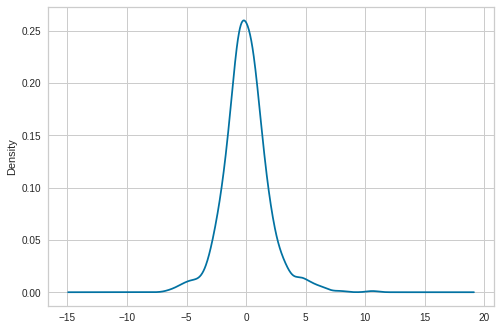

In [ ]:
df_result["guss_udr_ms-Label"].plot(kind="kde");

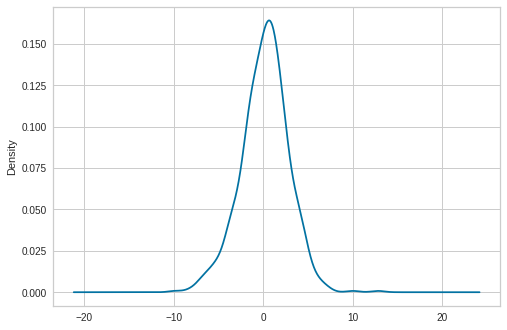

In [ ]:
df_result["guss_udr_ms-wind_gust0"].plot(kind="kde");

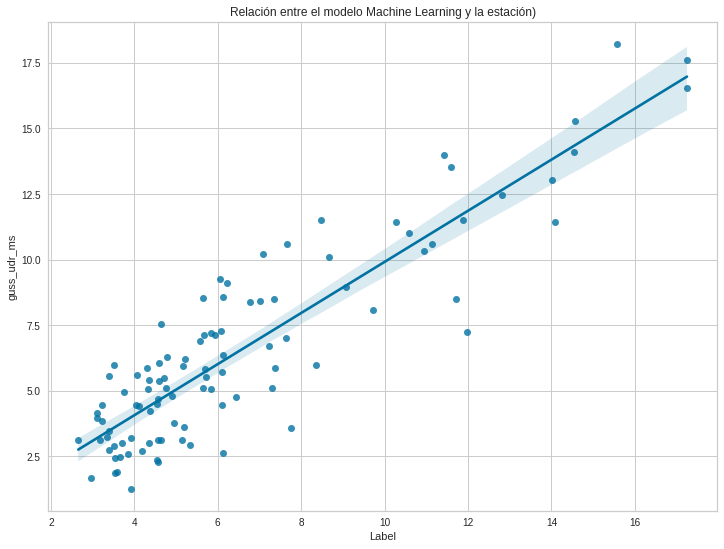

In [68]:
plt.figure(figsize=(12, 9))
plt.title("Relación entre el modelo Machine Learning y la estación)")
sns.regplot( x="Label", y="guss_udr_ms",data=df_result.sample(100),);

In [ ]:
x_var=get_config("X_train").columns.to_list()
x_var

In [ ]:
X_train=get_config("X_train")
y_train=get_config("y_train")
from lightgbm.sklearn import LGBMRegressor
ml_model=LGBMRegressor(n_estimators=200).fit(X_train,y_train)

In [ ]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("gust_udr_d0.al", 'wb'))